In [189]:
import pandas as pd
import numpy as np
import re

In [190]:
file_path = "/home/carlos/IA/FINAL/time-series_forecasting/September 2025 Complete Monthly Ridership (with adjustments and estimates)_251103 (1).xlsx"
data = pd.read_excel(file_path, sheet_name="UPT", header=0)
data.head(5)

,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,12/2024,1/2025,2/2025,3/2025,4/2025,5/2025,6/2025,7/2025,8/2025,9/2025
0,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,...,87395.0,96298.0,83450.0,92739.0,96060.0,99005.0,93461.0,94065.0,92922.0,94417.0
1,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,...,7868.0,6315.0,6764.0,11638.0,13385.0,13713.0,12722.0,13221.0,13301.0,14626.0
2,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,...,24240.0,26935.0,22362.0,30745.0,40686.0,46177.0,62267.0,83658.0,78141.0,53602.0
3,1.0,0001,King County,Inactive,Full Reporter,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0001,King County,Active,Full Reporter,80389.0,"Seattle--Tacoma, WA",MB,DO,Bus,...,5655460.0,6158381.0,5748640.0,6602619.0,6841438.0,6766326.0,6686060.0,6716230.0,6629625.0,6597525.0


### Eliminar las columnas hasta el 2023 


In [191]:
cols_to_drop = []

for col in data.columns:
    if "/" in col:
        parts = col.split("/")
        
        if len(parts) == 2:
            mes, año = parts
            
            if año.isdigit():
                year = int(año)
                
                if year > 2023:
                    cols_to_drop.append(col)

data = data.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)


Columnas eliminadas: ['1/2024', '2/2024', '3/2024', '4/2024', '5/2024', '6/2024', '7/2024', '8/2024', '9/2024', '10/2024', '11/2024', '12/2024', '1/2025', '2/2025', '3/2025', '4/2025', '5/2025', '6/2025', '7/2025', '8/2025', '9/2025']


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Columns: 274 entries, NTD ID to 12/2023
dtypes: float64(266), object(8)
memory usage: 4.9+ MB


In [193]:
data.isnull().sum()

NTD ID                           12
Legacy NTD ID                   102
Agency                           12
Mode/Type of Service Status      12
Reporter Type                    12
                               ... 
8/2023                         1021
9/2023                         1020
10/2023                        1021
11/2023                        1023
12/2023                        1021
Length: 274, dtype: int64

In [194]:
hr = data[data["Mode"] == "HR"].copy()
date_cols = [c for c in hr.columns
             if isinstance(c, str) and re.match(r"^\d{1,2}/\d{4}$", c)]
hr["num_missing"] = hr[date_cols].isna().sum(axis=1)
hr_sort = hr.sort_values(by="num_missing", ascending=False)
hr_sort[["Agency", "UZA Name", "num_missing"]].head(10)


,Agency,UZA Name,num_missing
1914,City and County of Honolulu,"Honolulu, HI",257
938,Alternativa de Transporte Integrado,"San Juan, PR",60
154,Massachusetts Bay Transportation Authority,"Boston, MA--NH",0
302,MTA New York City Transit,"New York--Jersey City--Newark, NY--NJ",0
350,Staten Island Rapid Transit Operating Authority,"New York--Jersey City--Newark, NY--NJ",0
504,Southeastern Pennsylvania Transportation Autho...,"Philadelphia, PA--NJ--DE--MD",0
318,Port Authority Transit Corporation,"Philadelphia, PA--NJ--DE--MD",0
349,Port Authority Trans-Hudson Corporation,"New York--Jersey City--Newark, NY--NJ",0
545,Maryland Transit Administration,"Baltimore, MD",0
537,Washington Metropolitan Area Transit Authority,"Washington--Arlington, DC--VA--MD",0


In [195]:
data = data[~data["UZA Name"].isin(["Honolulu, HI", "San Juan, PR"])]


In [196]:
new_rows = []

for idx, row in data.iterrows():
    mode_value = str(row["Mode"])
    ntd_value = str(row["NTD ID"])
    if mode_value == "HR" or ntd_value == "NTD ID":
        new_rows.append(row)

newData = pd.DataFrame(new_rows).reset_index(drop=True)

newData.head(5)


,NTD ID,Legacy NTD ID,Agency,Mode/Type of Service Status,Reporter Type,UACE CD,UZA Name,Mode,TOS,3 Mode,...,3/2023,4/2023,5/2023,6/2023,7/2023,8/2023,9/2023,10/2023,11/2023,12/2023
0,10003.0,1003,Massachusetts Bay Transportation Authority,Active,Full Reporter,9271.0,"Boston, MA--NH",HR,DO,Rail,...,7266019.0,6915755.0,7555508.0,7475582.0,7428692.0,7872552.0,7549343.0,7629155.0,6772827.0,6435183.0
1,20008.0,2008,MTA New York City Transit,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,176647689.0,161779844.0,183903625.0,170181767.0,152923078.0,168009408.0,181300044.0,181403724.0,176363812.0,173256395.0
2,20075.0,2075,Port Authority Transit Corporation,Active,Full Reporter,69076.0,"Philadelphia, PA--NJ--DE--MD",HR,DO,Rail,...,476433.0,430601.0,466231.0,463087.0,422754.0,462180.0,441297.0,500393.0,470901.0,451425.0
3,20098.0,2098,Port Authority Trans-Hudson Corporation,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,4552683.0,4383457.0,4967486.0,4661541.0,4534373.0,4837267.0,4805878.0,5236791.0,4738761.0,4561550.0
4,20099.0,2099,Staten Island Rapid Transit Operating Authority,Active,Full Reporter,63217.0,"New York--Jersey City--Newark, NY--NJ",HR,DO,Rail,...,484681.0,404962.0,476246.0,436881.0,366963.0,384334.0,440059.0,509497.0,473945.0,414707.0


In [197]:
df = newData.copy()

In [198]:
lines = df.astype(str).apply(lambda row: ",".join(row), axis=1).tolist()
header = df.columns.tolist()
agency_names = newData["Agency"].unique()
agency_names = {ag: i for i, ag in enumerate(agency_names)}


print(df.columns.tolist())
print(len(df))


['NTD ID', 'Legacy NTD ID', 'Agency', 'Mode/Type of Service Status', 'Reporter Type', 'UACE CD', 'UZA Name', 'Mode', 'TOS', '3 Mode', '1/2002', '2/2002', '3/2002', '4/2002', '5/2002', '6/2002', '7/2002', '8/2002', '9/2002', '10/2002', '11/2002', '12/2002', '1/2003', '2/2003', '3/2003', '4/2003', '5/2003', '6/2003', '7/2003', '8/2003', '9/2003', '10/2003', '11/2003', '12/2003', '1/2004', '2/2004', '3/2004', '4/2004', '5/2004', '6/2004', '7/2004', '8/2004', '9/2004', '10/2004', '11/2004', '12/2004', '1/2005', '2/2005', '3/2005', '4/2005', '5/2005', '6/2005', '7/2005', '8/2005', '9/2005', '10/2005', '11/2005', '12/2005', '1/2006', '2/2006', '3/2006', '4/2006', '5/2006', '6/2006', '7/2006', '8/2006', '9/2006', '10/2006', '11/2006', '12/2006', '1/2007', '2/2007', '3/2007', '4/2007', '5/2007', '6/2007', '7/2007', '8/2007', '9/2007', '10/2007', '11/2007', '12/2007', '1/2008', '2/2008', '3/2008', '4/2008', '5/2008', '6/2008', '7/2008', '8/2008', '9/2008', '10/2008', '11/2008', '12/2008', '1/20

In [199]:
agency_names

{'Massachusetts Bay Transportation Authority': 0,
 'MTA New York City Transit': 1,
 'Port Authority Transit Corporation': 2,
 'Port Authority Trans-Hudson Corporation': 3,
 'Staten Island Rapid Transit Operating Authority': 4,
 'Southeastern Pennsylvania Transportation Authority': 5,
 'Washington Metropolitan Area Transit Authority': 6,
 'Maryland Transit Administration': 7,
 'Metropolitan Atlanta Rapid Transit Authority': 8,
 'County of Miami-Dade ': 9,
 'The Greater Cleveland Regional Transit Authority': 10,
 'Chicago Transit Authority': 11,
 'San Francisco Bay Area Rapid Transit District': 12,
 'Los Angeles County Metropolitan Transportation Authority ': 13}

### Parsing data


In [200]:
date = df.columns[10:]
dates = pd.to_datetime(date,format="%m/%Y")
raw_data = df[date_cols].to_numpy(dtype=float)


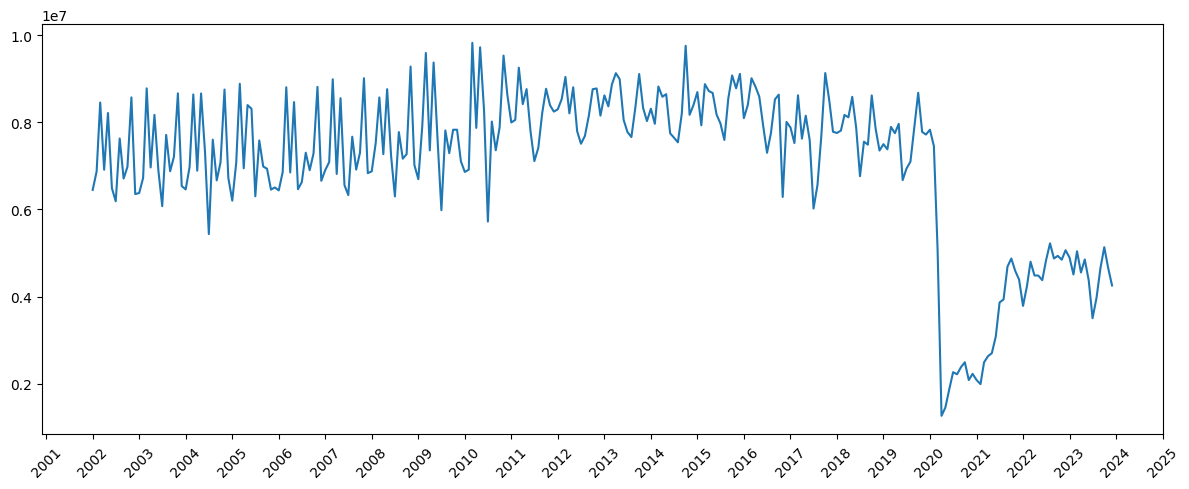

In [201]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(dates, raw_data[5])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Marcas cada 12 meses
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Plortting all agents

In [202]:
agency_names

{'Massachusetts Bay Transportation Authority': 0,
 'MTA New York City Transit': 1,
 'Port Authority Transit Corporation': 2,
 'Port Authority Trans-Hudson Corporation': 3,
 'Staten Island Rapid Transit Operating Authority': 4,
 'Southeastern Pennsylvania Transportation Authority': 5,
 'Washington Metropolitan Area Transit Authority': 6,
 'Maryland Transit Administration': 7,
 'Metropolitan Atlanta Rapid Transit Authority': 8,
 'County of Miami-Dade ': 9,
 'The Greater Cleveland Regional Transit Authority': 10,
 'Chicago Transit Authority': 11,
 'San Francisco Bay Area Rapid Transit District': 12,
 'Los Angeles County Metropolitan Transportation Authority ': 13}

### Fig. 2. Ridership at larger heavy rail agencies from January 2002 to December 2023.

Massachusetts Bay Transportation Authority
Port Authority Transit Corporation
Port Authority Trans-Hudson Corporation
Southeastern Pennsylvania Transportation Authority
Washington Metropolitan Area Transit Authority
Metropolitan Atlanta Rapid Transit Authority
Chicago Transit Authority
San Francisco Bay Area Rapid Transit District
Los Angeles County Metropolitan Transportation Authority 


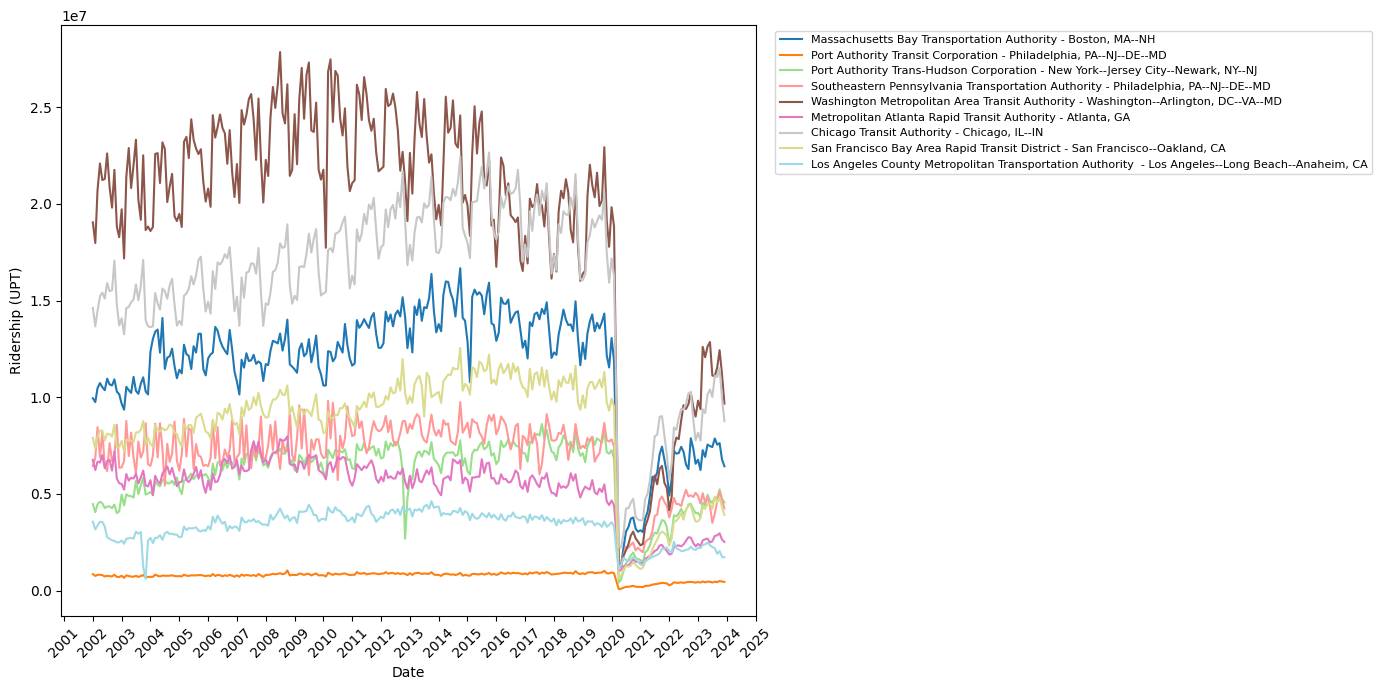

In [203]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Lista de agencias importantes que quieres graficar
graficar = [
    'Chicago Transit Authority',
    'Los Angeles County Metropolitan Transportation Authority ',
    "Massachusetts Bay Transportation Authority",
    'Metropolitan Atlanta Rapid Transit Authority',
    "Port Authority Trans-Hudson Corporation",
    "Port Authority Transit Corporation",
    "San Francisco Bay Area Rapid Transit District",
    'Southeastern Pennsylvania Transportation Authority',   # ojo: revisa typo
    'Washington Metropolitan Area Transit Authority'      # ojo: revisa typo
]

# Recolectamos todos los índices (filas) que vamos a graficar
idxs_a_graficar = []

for name, id_ in agency_names.items():
    if name in graficar:
        print(name)
        idxs = df.index[df["Agency"] == name].tolist()
        idxs_a_graficar.extend(idxs)

# Creamos una sola figura
plt.figure(figsize=(14, 7))

# Colores distintos para cada serie (una por fila en raw_data)
n_series = len(idxs_a_graficar)
colors = plt.cm.tab20(np.linspace(0, 1, n_series))  # hasta 20 colores distintos

for color, idx in zip(colors, idxs_a_graficar):
    plt.plot(
        dates,
        raw_data[idx],
        label=f'{df.loc[idx, "Agency"]} - {df.loc[idx, "UZA Name"]}',
        color=color,
        linewidth=1.5
    )

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Ridership (UPT)")


plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


### Fig. 3. Ridership at smaller heavy rail agencies from January 2002 to December 2023.

In [204]:
agency_names

{'Massachusetts Bay Transportation Authority': 0,
 'MTA New York City Transit': 1,
 'Port Authority Transit Corporation': 2,
 'Port Authority Trans-Hudson Corporation': 3,
 'Staten Island Rapid Transit Operating Authority': 4,
 'Southeastern Pennsylvania Transportation Authority': 5,
 'Washington Metropolitan Area Transit Authority': 6,
 'Maryland Transit Administration': 7,
 'Metropolitan Atlanta Rapid Transit Authority': 8,
 'County of Miami-Dade ': 9,
 'The Greater Cleveland Regional Transit Authority': 10,
 'Chicago Transit Authority': 11,
 'San Francisco Bay Area Rapid Transit District': 12,
 'Los Angeles County Metropolitan Transportation Authority ': 13}

Staten Island Rapid Transit Operating Authority
Maryland Transit Administration
County of Miami-Dade 
The Greater Cleveland Regional Transit Authority


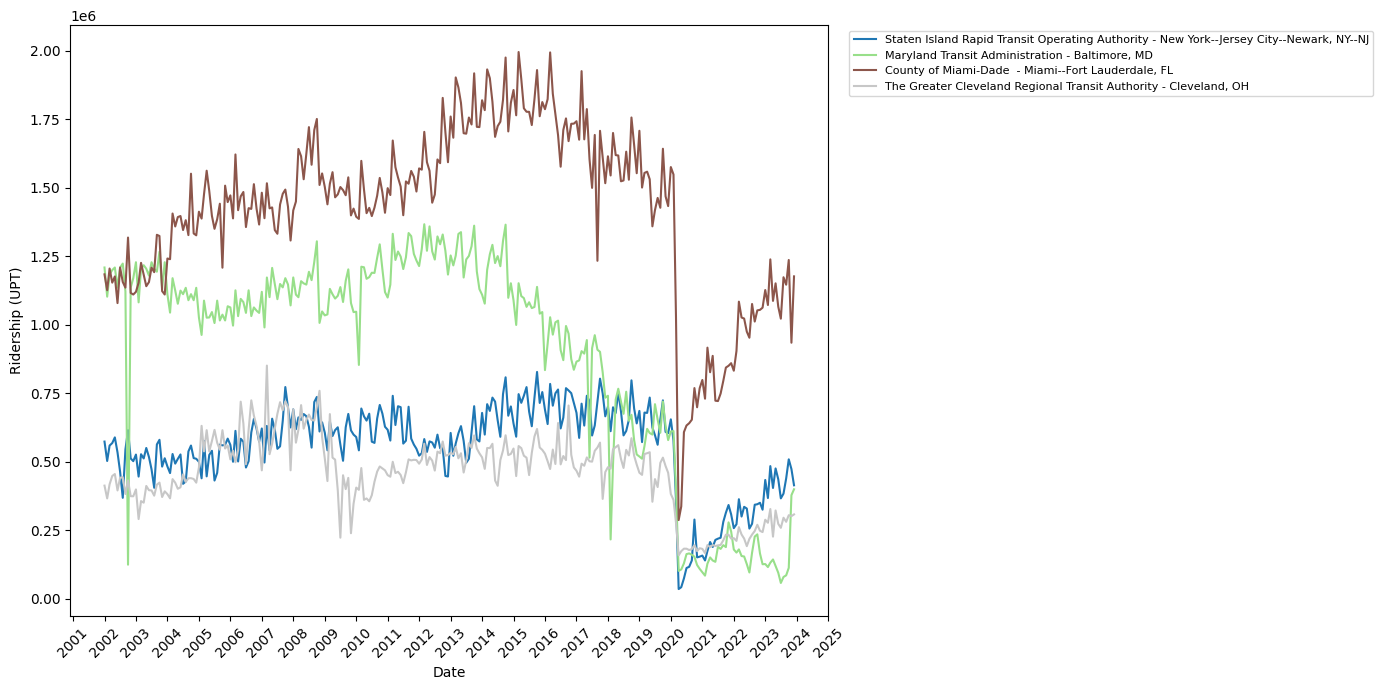

In [205]:

# Lista de agencias importantes que quieres graficar
graficar = [
    'County of Miami-Dade ',
    'Maryland Transit Administration',
    'Staten Island Rapid Transit Operating Authority',
    'The Greater Cleveland Regional Transit Authority'   
]

# Recolectamos todos los índices (filas) que vamos a graficar
idxs_a_graficar = []

for name, id_ in agency_names.items():
    if name in graficar:
        print(name)
        idxs = df.index[df["Agency"] == name].tolist()
        idxs_a_graficar.extend(idxs)

# Creamos una sola figura
plt.figure(figsize=(14, 7))

# Colores distintos para cada serie (una por fila en raw_data)
n_series = len(idxs_a_graficar)
colors = plt.cm.tab20(np.linspace(0, 1, 5))  # hasta 20 colores distintos

for color, idx in zip(colors, idxs_a_graficar):
    plt.plot(
        dates,
        raw_data[idx],
        label=f'{df.loc[idx, "Agency"]} - {df.loc[idx, "UZA Name"]}',
        color=color,
        linewidth=1.5
    )

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Ridership (UPT)")


plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()


## plotting the post and pre covid 

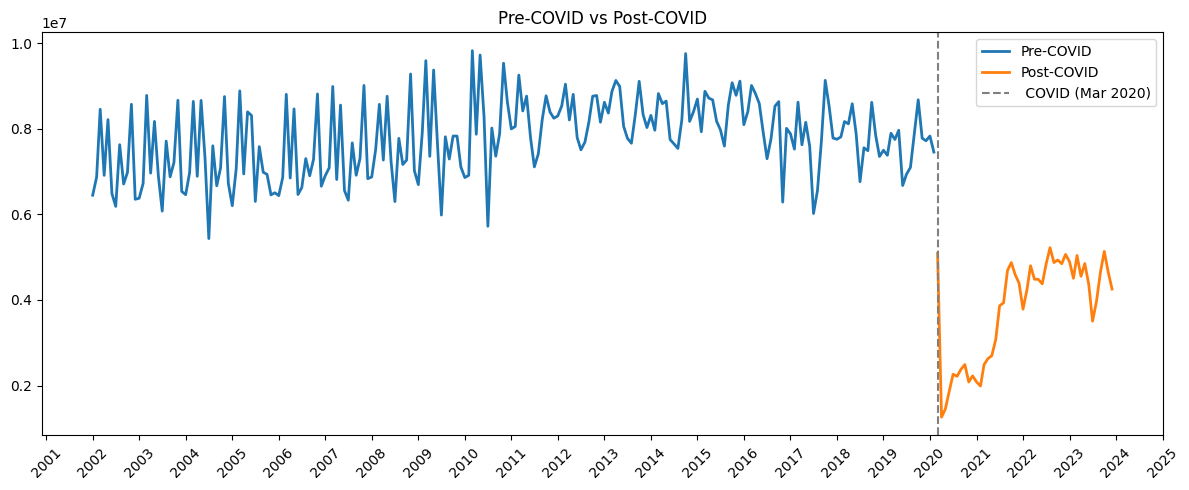

In [206]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
value = 5
# Fecha corte
cut = pd.Timestamp("2020-03-01")

# Máscaras
mask_pre  = dates < cut
mask_post = dates >= cut

plt.figure(figsize=(12,5))

# --- Pre-COVID ---
plt.plot(dates[mask_pre], raw_data[value][mask_pre], label="Pre-COVID", linewidth=2)

# --- Post-COVID ---
plt.plot(dates[mask_post], raw_data[value][mask_post], label="Post-COVID", linewidth=2)

# --- Formato del eje ---
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.axvline(cut, color='gray', linestyle='--', label=" COVID (Mar 2020)")

plt.legend()
plt.xticks(rotation=45)
plt.title("Pre-COVID vs Post-COVID")
plt.tight_layout()
plt.show()


### Preparción de data Full dataset

In [207]:
class AgencyMatrix:
    def __init__(self, mat, agency_names):
        self.by_name = {name: mat[idx] for name, idx in agency_names.items()}
        self.by_index = {idx: mat[idx] for name, idx in agency_names.items()}
    
    def __getitem__(self, key):
        return self.by_name[key] if key in self.by_name else self.by_index[key]

agency_mat = AgencyMatrix(raw_data, agency_names)


In [208]:
list(agency_mat.by_index.keys())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [209]:
list(agency_mat.by_name.keys()) 

['Massachusetts Bay Transportation Authority',
 'MTA New York City Transit',
 'Port Authority Transit Corporation',
 'Port Authority Trans-Hudson Corporation',
 'Staten Island Rapid Transit Operating Authority',
 'Southeastern Pennsylvania Transportation Authority',
 'Washington Metropolitan Area Transit Authority',
 'Maryland Transit Administration',
 'Metropolitan Atlanta Rapid Transit Authority',
 'County of Miami-Dade ',
 'The Greater Cleveland Regional Transit Authority',
 'Chicago Transit Authority',
 'San Francisco Bay Area Rapid Transit District',
 'Los Angeles County Metropolitan Transportation Authority ']

### Normalización Zscore

In [210]:
normalized_agents = {}
scalers = {}

for idx in range(14):
    agent = agency_mat.by_index[idx].astype("float32")
    mean  = agent.mean()
    std   = agent.std()

    scalers[f"agent{idx+1}"] = {"mean": mean, "std": std}
    normalized_agents[f"agent{idx+1}"] = (agent - mean) / std
#para desnormalizar predicciones 
#pred_original = pred_normalized * scalers["agent1"]["std"] + scalers["agent1"]["mean"]


### Agent1

In [211]:
agents = {}

for i in range(1,15):
    agent = normalized_agents[f"agent{i}"]
    
    n = len(agent)
    num_train = int(0.5 * n)
    num_val   = int(0.25 * n)
    num_test  = n - num_train - num_val

    agents[f"agent{i}"] = {
        "data": agent,
        "train": num_train,
        "val": num_val,
        "test": num_test
    }


In [212]:
for name, info in agents.items():
    print(name, info["train"], info["val"], info["test"])


agent1 132 66 66
agent2 132 66 66
agent3 132 66 66
agent4 132 66 66
agent5 132 66 66
agent6 132 66 66
agent7 132 66 66
agent8 132 66 66
agent9 132 66 66
agent10 132 66 66
agent11 132 66 66
agent12 132 66 66
agent13 132 66 66
agent14 132 66 66


### "Quiero usar los últimos 24–36 meses para predecir el próximo mes"

In [186]:
import keras 

In [187]:
sampling_rate = 1
sequence_length = 35
forecast_steps = 1
delay = sampling_rate*(sequence_length+forecast_steps-1)
batch_size = 32

In [219]:
raw_data_1 = agents["agent1"]["data"]


In [222]:

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data_1[:-delay],
    targets=raw_data_1[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=agents["agent1"]["train"],
)
val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data_1[:-delay],
    targets=raw_data_1[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=agents["agent1"]["train"],
    end_index=agents["agent1"]["train"] + agents["agent1"]["val"],
)
test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data_1[:-delay],
    targets=raw_data_1[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=agents["agent1"]["train"] + agents["agent1"]["val"],
)

In [223]:
for samples,targets in train_dataset:
    print("Samples shape:", samples.shape)
    print("Targets shape:", targets.shape)
    break

Samples shape: (32, 35)
Targets shape: (32,)


### Entrenar una red nueronal full conected

In [ ]:
#Entrenar con una red neuronal 
from sklearn.model_selection import train_test_split
